In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from scipy.stats import norm
import shutil
#torch.set_default_dtype(torch.float64)

In [2]:
FONTSIZE = 18

# Try LaTeX settings, fall back gracefully
try:
    if shutil.which("latex") is not None:
        plt.rc("text", usetex=True)
        plt.rc(
            "text.latex",
            preamble=r"\usepackage{amsmath}\usepackage[bitstream-charter]{mathdesign}",
        )
        plt.rc("font", family="serif", size=FONTSIZE, serif="Charter")
    else:
        raise RuntimeError("LaTeX not found")
except Exception:
    # Fallback to default matplotlib serif font
    plt.rc("text", usetex=False)
    plt.rc("font", family="serif", size=FONTSIZE)

plt.rc("axes", titlesize="medium")

# Define color cycle
colors = [f"C{i}" for i in range(5)]

In [3]:
# Get some simple toy function
def generate_data(n_samples, unc=0.2, seed=None):
    """
    Simple 1D regression problem based
    """
    if seed is not None:
        np.random.seed(seed)
    x = np.concatenate((np.random.uniform(-1, -0.22, n_samples // 2), np.random.uniform(0.22, 1, n_samples - n_samples // 2)))
    y = 0.5 * np.sin(23*x) + x/2
    y_noise = y + np.random.randn(n_samples) * unc #* (x+1) + np.random.randn(n_samples) * unc/2
    return x, y_noise

In [4]:
x_train, y_train = generate_data(n_samples=2000, unc=0.1, seed=42)
x_fit = x_train.reshape(-1, 1)  # sklearn expects 2D array for features

In [5]:
kernel = RBF(length_scale=0.1) + WhiteKernel(noise_level=1e-3)
gp = GaussianProcessRegressor(kernel=kernel, normalize_y=True)
gp.fit(x_fit, y_train)

,kernel,RBF(length_sc...e_level=0.001)
,alpha,1e-10
,optimizer,'fmin_l_bfgs_b'
,n_restarts_optimizer,0
,normalize_y,True
,copy_X_train,True
,n_targets,None
,random_state,None
,kernel__k1,RBF(length_scale=0.1)
,kernel__k2,WhiteKernel(noise_level=0.001)
,kernel__k1__length_scale,0.1


In [6]:
x_test = np.linspace(-1.25, 1.25, 5000)
y_mean, y_std = gp.predict(x_test.reshape(-1, 1), return_std=True)

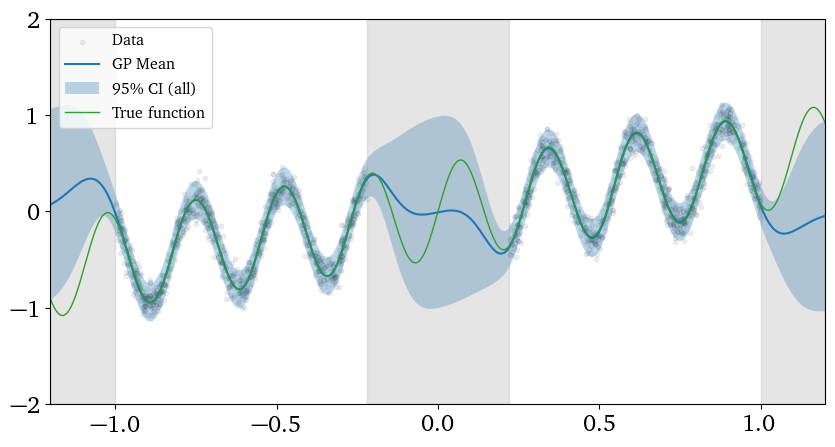

In [7]:
plt.figure(figsize=(10, 5))
plt.scatter(x_train,y_train, s=10, alpha=1/16, label='Data', color="k")
plt.plot(x_test, y_mean, color="C0", label='GP Mean')
z = norm.ppf(0.975)  # two-sided: (1 + 0.95)/2
lower = y_mean - z * y_std
upper = y_mean + z * y_std
plt.fill_between(x_test, lower, upper, alpha=0.3, label=r'95\% CI (all)')


y = 0.5 * np.sin(23*x_test) + x_test/2

plt.axvspan(-0.22, 0.22, color='gray', alpha=0.2)
plt.axvspan(1, 1.2, color='gray', alpha=0.2)
plt.axvspan(-1.2, -1.0, color='gray', alpha=0.2)
# plot the prediction with unc:
plt.plot(x_test, y, color="C2",label='True function', linewidth=1)
plt.legend(fontsize=FONTSIZE-6, loc='upper left')
plt.ylim(-2,2)
plt.xlim(-1.2,1.2)
plt.show()